In [1]:
!python --version

Python 3.8.7


In [8]:
import numpy as np
import pandas as pd
import ampligraph
import tensorflow as tf

In [9]:
import csv

from enum import Enum


class Ontology:
    def __init__(self):
        self.big_triples = []

    def add(self, triple):
        self.big_triples.append(triple)


class ex(Enum):
    hasHeroStats = "hasHeroStats"
    hasDamage = "hasDamage"
    hasDeny = "hasDeny"
    hasEPM = "hasEPM"
    hasGPM = "hasGPM"
    hasHeal = "hasHeal"
    hasLastHits = "hasLastHits"
    hasTeam = "hasTeam"
    hasCharacter = "hasCharacter"
    hasPosition = "hasPosition"
    hasAspect = "hasAspect"
    hasSkillsOrderOnCarry = "hasSkillsOrderOnCarry"
    hasSkillsOrderOnMid = "hasSkillsOrderOnMid"
    hasSkillsOrderOnOffLane = "hasSkillsOrderOnOffLane"
    hasSkillsOrderOnSemiSupport = "hasSkillsOrderOnSemiSupport"
    hasSkillsOrderOnFullSupport = "hasSkillsOrderOnFullSupport"
    hasAbstractCharacter = "hasAbstractCharacter"
    hasCharacterIndividual = "hasCharacterIndividual"
    hasWinRateOnAllPositions = "hasWinRateOnAllPositions"
    hasWinRateOnCarry = "hasWinRateOnCarry"
    hasWinRateOnMid = "hasWinRateOnMid"
    hasWinRateOnOffLane = "hasWinRateOnOffLane"
    hasWinRateOnSemiSupport = "hasWinRateOnSemiSupport"
    hasWinRateOnFullSupport = "hasWinRateOnFullSupport"


def encode(string):
    return string.lower().replace(' ', '_')


def literal(a, datatype=""):
    return str(a)


def number_to_label(value, bins, labels):
    value = float(value)
    for i in range(1, len(bins)):
        if bins[i-1] < value <= bins[i]:
            return labels[i-1]
    return ""


winrate_to_winrate = lambda x: number_to_label(x, [0, 0.1, 0.2, 0.3, 0.4, 0.45, 0.48, 0.5, 0.52, 0.55, 0.6, 1], ["0-0.1", "0.1-0.2", "0.2-0.3", "0.3-0.4", "0.4-0.45", "0.45-0.48", "0.48-0.5", "0.5-0.52", "0.52-0.55", "0.55-0.6", "0.6-1"])


has_item = "hasItem"
refers_to_item = "refersToItem"
item_value = "itemValue"
hasWinner = "hasWinner"
hasAspectPickRate = "hasAspectPickRate"
refersToAspect = "refersToAspect"
aspect_pick_rate_value = "aspectPickRateValue"
refers_to_character = "refersToCharacter"
value = "value"
hasPosition = "hasPosition"
hasItemPickRate = "hasItemPickRate"
has_timing = "hasTiming"


g = Ontology()


# Открываем CSV файл со статистикой
with open(r"csv/stats.csv", mode='r', encoding='utf-8') as file:
    reader = csv.reader(file)

    next(reader, None)

    for row in reader:
        # Извлекаем данные из строки
        character_name = row[0]
        hero_stats_name = row[1]
        damage = number_to_label(row[2], [0, 5000, 10000, 15000, 20000, 25000, 30000, 40000, 50000, 100000], 
                         ["0-5000", "5000-10000", "10000-15000", "15000-20000", "20000-25000", 
                          "25000-30000", "30000-40000", "40000-50000", "50000-100000"])
        deny = number_to_label(row[3], [0, 5, 10, 15, 20, 25, 30, 1000], 
                       ["0-5", "5-10", "10-15", "15-20", "20-25", "25-30", "30-1000"])
        epm = number_to_label(row[4], [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 5000], 
                      ["0-100", "100-200", "200-300", "300-400", "400-500", "500-600", 
                       "600-700", "700-800", "800-900", "900-1000", "1000-5000"])
        gpm = number_to_label(row[5], [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 5000], 
                      ["0-100", "100-200", "200-300", "300-400", "400-500", "500-600", 
                       "600-700", "700-800", "800-900", "900-1000", "1000-5000"])
        heal = number_to_label(row[6], [0, 1000, 2000, 5000, 10000, 20000, 50000, 100000], 
                       ["0-1000", "1000-2000", "2000-5000", "5000-10000", "10000-20000", 
                        "20000-50000", "50000-100000"])
        last_hits = number_to_label(row[7], [0, 20, 50, 100, 150, 200, 300, 400, 600, 1000, 10000], 
                            ["0-20", "20-50", "50-100", "100-150", "150-200", "200-300", 
                             "300-400", "400-600", "600-1000", "1000-10000"])

        # Создаем URI для персонажа и его статистики
        character_uri = encode(character_name)
        hero_stats_uri = encode(hero_stats_name)

        # Связываем персонажа с его статистикой
        g.add((character_uri, ex.hasHeroStats, hero_stats_uri))

        # Добавляем свойства для статистики как DataProperties
        g.add((hero_stats_uri, ex.hasDamage, damage))
        g.add((hero_stats_uri, ex.hasDeny, deny))
        g.add((hero_stats_uri, ex.hasEPM, epm))
        g.add((hero_stats_uri, ex.hasGPM, gpm))
        g.add((hero_stats_uri, ex.hasHeal, heal))
        g.add((hero_stats_uri, ex.hasLastHits, last_hits))

# Открываем CSV файл с предметами
with open(r"csv/items.csv", mode='r', encoding='utf-8') as file:
    reader = csv.reader(file)

    next(reader, None)  # Пропустить заголовок

    for row in reader:
        character_name = row[0]
        item_name = row[1]
        item_count = row[2]

        # Создаем URI для персонажа, предмета и количества предметов
        character_uri = encode(character_name)
        item_uri = encode(item_name)
        item_count_uri = encode(character_name + "_" + item_name + "_count")

        # Связываем персонажа с количеством предметов
        g.add((character_uri, has_item, item_count_uri))
        g.add((item_count_uri, refers_to_item, item_uri))
        g.add((item_count_uri, item_value, literal(item_count)))

with open(r"csv/teams.csv", mode='r', encoding='utf-8') as file:
    reader = csv.reader(file)

    next(reader, None)

    for row in reader:
        # Создаем индивидуалов и добавляем их в граф
        if row[1]:
            individual = encode(row[1])
            game_uri = encode(row[0])
            g.add((game_uri, ex.hasTeam, individual))

with open(r"csv/team_characters.csv", mode='r', encoding='utf-8') as file:
    reader = csv.reader(file)

    next(reader, None)

    for row in reader:
        # Создаем индивидуалов и добавляем их в граф
        generic_character_uri = encode(' '.join(row[1].split(' ')[:-1]))
        character_uri = encode(row[1])
        
        if row[0]:
            individual = encode(row[0])
            g.add((individual, ex.hasCharacter, character_uri))
        if row[2]:
            individual = encode(row[2])
            g.add((character_uri, ex.hasPosition, individual))
        if row[3]:
            individual = encode(row[3])
            g.add((character_uri, ex.hasAspect, individual))
        g.add((character_uri, ex.hasAbstractCharacter, generic_character_uri))
        g.add((generic_character_uri, ex.hasCharacterIndividual, character_uri))

with open(r"csv/winners.csv", mode='r', encoding='utf-8') as file:
    reader = csv.reader(file)

    next(reader, None)

    for row in reader:
        team_uri, winner_uri = encode(row[0]), encode(row[1])
        g.add((team_uri, hasWinner, winner_uri))

with open(r"csv/skills_order.csv", mode='r', encoding='utf-8') as file:
    reader = csv.reader(file)

    next(reader, None)

    for row in reader:
        # Извлекаем данные из строки
        character_name = row[0]
        skills_order_on_carry = row[1]
        skills_order_on_mid = row[2]
        skills_order_on_off_lane = row[3]
        skills_order_on_semi_support = row[4]
        skills_order_on_full_support = row[5]

        # Создаем URI для персонажа и его статистики
        character_uri = encode(character_name)

        # Добавляем свойства для статистики как DataProperties
        g.add((character_uri, ex.hasSkillsOrderOnCarry, literal(skills_order_on_carry)))
        g.add((character_uri, ex.hasSkillsOrderOnMid, literal(skills_order_on_mid)))
        g.add((character_uri, ex.hasSkillsOrderOnOffLane, literal(skills_order_on_off_lane)))
        g.add((character_uri, ex.hasSkillsOrderOnSemiSupport, literal(skills_order_on_semi_support)))
        g.add((character_uri, ex.hasSkillsOrderOnFullSupport, literal(skills_order_on_full_support)))

# Открываем CSV файл с предметами
with open(r"csv/aspect_stats.csv", mode='r', encoding='utf-8') as file:
    reader = csv.reader(file)

    next(reader, None)  # Пропустить заголовок

    for row in reader:
        character_name = row[0]
        aspect_name = row[1]
        aspect_pick_rate_on_carry = row[2]
        aspect_pick_rate_on_mid = row[3]
        aspect_pick_rate_on_off_lane = row[4]
        aspect_pick_rate_on_semi_support = row[5]
        aspect_pick_rate_on_full_support = row[6]
        character_individual = encode(character_name.replace("'", ""))
        aspect_individual = encode(aspect_name)
        aspect_pick_rate_on_carry_uri = encode(character_name + "_" + aspect_name + "_pick_rate_on_carry")
        g.add((character_individual, hasAspectPickRate, aspect_pick_rate_on_carry_uri))
        g.add((aspect_pick_rate_on_carry_uri, refersToAspect, aspect_individual))
        g.add((aspect_pick_rate_on_carry_uri, aspect_pick_rate_value,
               literal(aspect_pick_rate_on_carry)))
        aspect_pick_rate_on_mid_uri = encode(character_name + "_" + aspect_name + "_pick_rate_on_mid")
        g.add((character_individual, hasAspectPickRate, aspect_pick_rate_on_mid_uri))
        g.add((aspect_pick_rate_on_mid_uri, refersToAspect, aspect_individual))
        g.add(
            (aspect_pick_rate_on_mid_uri, aspect_pick_rate_value, literal(aspect_pick_rate_on_mid)))
        aspect_pick_rate_on_off_lane_uri = encode(character_name + "_" + aspect_name + "_pick_rate_on_off_lane")
        g.add((character_individual, hasAspectPickRate, aspect_pick_rate_on_off_lane_uri))
        g.add((aspect_pick_rate_on_off_lane_uri, refersToAspect, aspect_individual))
        g.add((aspect_pick_rate_on_off_lane_uri, aspect_pick_rate_value,
               literal(aspect_pick_rate_on_off_lane)))
        aspect_pick_rate_on_semi_support_uri = encode(character_name + "_" + aspect_name + "_pick_rate_on_semi_support")
        g.add((character_individual, hasAspectPickRate, aspect_pick_rate_on_semi_support_uri))
        g.add((aspect_pick_rate_on_semi_support_uri, refersToAspect, aspect_individual))
        g.add((aspect_pick_rate_on_semi_support_uri, aspect_pick_rate_value,
               literal(aspect_pick_rate_on_semi_support)))
        aspect_pick_rate_on_full_support_uri = encode(character_name + "_" + aspect_name + "_pick_rate_on_full_support")
        g.add((character_individual, hasAspectPickRate, aspect_pick_rate_on_full_support_uri))
        g.add((aspect_pick_rate_on_full_support_uri, refersToAspect, aspect_individual))
        g.add((aspect_pick_rate_on_full_support_uri, aspect_pick_rate_value,
               literal(aspect_pick_rate_on_full_support)))

with open(r"csv/winrates.csv", mode='r', encoding='utf-8') as file:
    reader = csv.reader(file)

    header = next(reader, None)
    win_rate_names = [None, None]
    win_rate_uris = [None, None]
    for win_rate_type in header[2:]:
        property_uri = "hasWinRateOn" + win_rate_type
        win_rate_names.append("hasWinRateOn" + win_rate_type)
        win_rate_uris.append(property_uri)

    idx = 0
    for row in reader:
        idx += 1
        if idx == 10:
            break
        character1_name = row[0].replace("'", "")
        character2_name = row[1].replace("'", "")

        character1_uri = encode(character1_name)
        character2_uri = encode(character2_name)
        character_individual = encode(character2_name)
        for i in range(2, len(row)):
            win_rate_individual = encode(f"{character1_name}_{character2_name}_{header[i]}_win_rate")

            g.add((character1_uri, win_rate_names[i], win_rate_individual))
            g.add((win_rate_individual, refers_to_character, character2_uri))
            g.add((win_rate_individual, value, winrate_to_winrate(row[i])))

pickrate_to_pickrate = lambda x: number_to_label(x, [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], ["0-0.1", "0.1-0.2", "0.2-0.3", "0.3-0.4", "0.4-0.5", "0.5-0.6", "0.6-0.7", "0.7-0.8", "0.8-0.9", "0.9-1"])

with open(r"csv/itemstats.csv", mode='r', encoding='utf-8') as file:
    reader = csv.reader(file)

    header = next(reader, None)
    for row in reader:
        # idx += 1
        # if idx == 100:
        # break
        character_name = row[0].replace("'", "")
        item_name = row[1]
        position_name = row[2]
        pickrate = pickrate_to_pickrate(float(row[3]))
        timing_name = row[4]
        count = row[5]

        character_uri = encode(character_name)
        item_uri = encode(item_name)
        character_individual = encode(character_name)  # Кодируем имя персонажа
        item_individual = encode(item_name)  # Кодируем имя персонажа
        position_uri = encode(position_name)
        position_individual = encode(position_name)  # Кодируем имя персонажа

        timing_uri = encode(timing_name)
        timing_individual = encode(timing_name)  # Кодируем имя персонажа
        g.add((character_individual, hasPosition, position_individual))

        item_count_uri = encode(character_name + "_" + item_name + "_count")

        timing_uri = encode(timing_name)
        timing_individual = encode(timing_name)  # Кодируем имя персонажа

        item_pick_rate_uri = encode(character_name + "_" + item_name + "_pick_rate_on" + position_name)

        # Связываем персонажа с количеством предметов

        g.add((character_individual, hasItemPickRate, item_pick_rate_uri))
        g.add((item_pick_rate_uri, has_timing, timing_uri))

        g.add((item_pick_rate_uri, has_item, item_count_uri))
        g.add((item_pick_rate_uri, item_value, literal(count)))

        g.add((item_pick_rate_uri, has_timing, timing_uri))
        g.add((item_pick_rate_uri, refers_to_item, item_uri))
        g.add((item_pick_rate_uri, item_value, literal(count)))
        g.add((item_pick_rate_uri, value, pickrate))

# Открываем CSV файл со статистикой
with open(r"csv/character_winrate.csv", mode='r', encoding='utf-8') as file:
    reader = csv.reader(file)

    next(reader, None)
    for row in reader:
        character,AllPositions,WinRateOnCarry,WinRateOnMid,WinRateOnOffLane,WinRateOnSemiSupport,WinRateOnFullSupport = row
        character = encode(character)
        g.add((character, ex.hasWinRateOnAllPositions, winrate_to_winrate(AllPositions)))
        g.add((character, ex.hasWinRateOnCarry, winrate_to_winrate(WinRateOnCarry)))
        g.add((character, ex.hasWinRateOnMid, winrate_to_winrate(WinRateOnMid)))
        g.add((character, ex.hasWinRateOnOffLane, winrate_to_winrate(WinRateOnOffLane)))
        g.add((character, ex.hasWinRateOnSemiSupport, winrate_to_winrate(WinRateOnSemiSupport)))
        g.add((character, ex.hasWinRateOnFullSupport, winrate_to_winrate(WinRateOnFullSupport)))
        

triples = []

with open("output.csv", "w", encoding="utf-8", newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["subject", "predicate", "object"])

    for triple in g.big_triples:
        if isinstance(triple[1], ex):
            triple = (triple[0], triple[1].value, triple[2])
        writer.writerow(triple)
        triples.append(triple)


In [10]:
del g.big_triples 
del g

In [11]:
from ampligraph.evaluation import train_test_split_no_unseen

X_train, X_valid = train_test_split_no_unseen(np.array(triples), test_size=10000)

In [12]:
from ampligraph.latent_features import ScoringBasedEmbeddingModel
from ampligraph.latent_features.loss_functions import get as get_loss
from ampligraph.latent_features.regularizers import get as get_regularizer

model = ScoringBasedEmbeddingModel(k=100,
                                   eta=20,
                                   scoring_type='ComplEx',
                                   seed=0)

# Optimizer, loss and regularizer definition
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
loss = get_loss('multiclass_nll')
regularizer = get_regularizer('LP', {'p': 3, 'lambda': 1e-3})

# Compilation of the model
model.compile(optimizer=optimizer, loss=loss, entity_relation_regularizer=regularizer)

In [14]:
model.fit(X_train,
          batch_size=int(X_train.shape[0] / 50),
          epochs=50, # Number of training epochs
          verbose=True # Displays a progress bar.
          )

Epoch 1/50
52/52 [==============================] - 23s 443ms/step - loss: 16539.3145
Epoch 2/50
52/52 [==============================] - 25s 472ms/step - loss: 12946.1064
Epoch 3/50
52/52 [==============================] - 24s 471ms/step - loss: 10429.9980
Epoch 4/50
52/52 [==============================] - 25s 481ms/step - loss: 8924.6533
Epoch 5/50
52/52 [==============================] - 26s 504ms/step - loss: 7966.2632
Epoch 6/50
52/52 [==============================] - 27s 519ms/step - loss: 7308.2295
Epoch 7/50
52/52 [==============================] - 27s 520ms/step - loss: 6829.8652
Epoch 8/50
52/52 [==============================] - 28s 533ms/step - loss: 6466.4829
Epoch 9/50
52/52 [==============================] - 29s 549ms/step - loss: 6176.0293
Epoch 10/50
52/52 [==============================] - 29s 563ms/step - loss: 5943.1831
Epoch 11/50
52/52 [==============================] - 30s 574ms/step - loss: 5748.9448
Epoch 12/50
52/52 [==============================] - 31s 588

In [15]:
ranks = model.evaluate(X_valid,
                      use_filter={'train': X_train,
                                  'test': X_valid},
                      corrupt_side='s,o',
                      verbose=True)

1001/1001 [==============================] - 352s 351ms/step


In [17]:
from ampligraph.evaluation import mr_score, mrr_score, hits_at_n_score

mr = mr_score(ranks)
mrr = mrr_score(ranks)

print("MRR: %.2f" % (mrr))
print("MR: %.2f" % (mr))

hits_10 = hits_at_n_score(ranks, n=10)
print("Hits@10: %.2f" % (hits_10))
hits_3 = hits_at_n_score(ranks, n=3)
print("Hits@3: %.2f" % (hits_3))
hits_1 = hits_at_n_score(ranks, n=1)
print("Hits@1: %.2f" % (hits_1))

MRR: inf
MR: 6844.27
Hits@10: 0.45
Hits@3: 0.38
Hits@1: 0.33


In [18]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
%matplotlib inline

In [19]:
df = pd.read_csv("csv/itemstats.csv")
# columns_to_encode = [0, 1, 2, 4]
# df.iloc[:, columns_to_encode] = df.iloc[:, columns_to_encode].applymap(encode)

In [20]:
big_df = df.copy()

timing_mapping = {"Start": 0, "Early Game": 1, "Mid Game": 2, "Late Game": 3}
big_df['Timing'] = big_df['Timing'].map(timing_mapping)

# Группируем по предмету и рассчитываем средние значения для PickRate и Timing
result = big_df.groupby('Item').agg(
    avg_pick_rate=('PickRate', 'mean'),
    avg_timing=('Timing', 'mean')
).reset_index()

result

,Item,avg_pick_rate,avg_timing
0,Abyssal Blade,0.404545,2.931818
1,Aeon Disk,0.281714,2.885714
2,Aether Lens,0.354769,2.069231
3,Aghanim's Scepter,0.429749,2.142458
4,Aghanim's Shard,0.347713,2.095142
...,...,...,...
132,Wind Waker,0.311404,3.000000
133,Witch Blade,0.324918,2.000000
134,Wraith Band,0.295048,1.048077
135,Yasha,0.400576,2.000000


In [21]:
df.isna().sum()

Character    0
Item         0
Position     0
PickRate     0
Timing       0
Count        0
dtype: int64

In [22]:
df.value_counts()

Character            Item            Position      PickRate  Timing      Count
Oracle               Dagon           Mid           0.11      Mid Game    1        4
Bloodseeker          Dagon           Semi Support  0.17      Late Game   1        4
Keeper Of The Light  Dagon           Carry         0.33      Mid Game    1        4
Necrophos            Dagon           Full Support  0.10      Mid Game    1        4
Bloodseeker          Dagon           Semi Support  0.20      Mid Game    1        3
                                                                                 ..
Io                   Magic Wand      Off Lane      0.14      Mid Game    1        1
                                                   0.38      Start       1        1
                                                   0.50      Early Game  1        1
                                     Semi Support  0.84      Early Game  1        1
Zeus                 Yasha and Kaya  Mid           0.20      Mid Game    1       

In [23]:
big_items = big_df.Item.apply(lambda x: encode(x)).unique()
big_embeddings = dict(zip(big_items, model.get_embeddings(big_items)))

In [24]:
embeddings_2d = PCA(n_components=2).fit_transform(np.array([i for i in big_embeddings.values()]))

In [25]:
from ampligraph.discovery import find_clusters
from sklearn.cluster import KMeans

clustering_algorithm = KMeans(n_clusters=5, n_init=10, max_iter=500, random_state=0)
clusters = find_clusters(big_items, model, clustering_algorithm, mode='e')

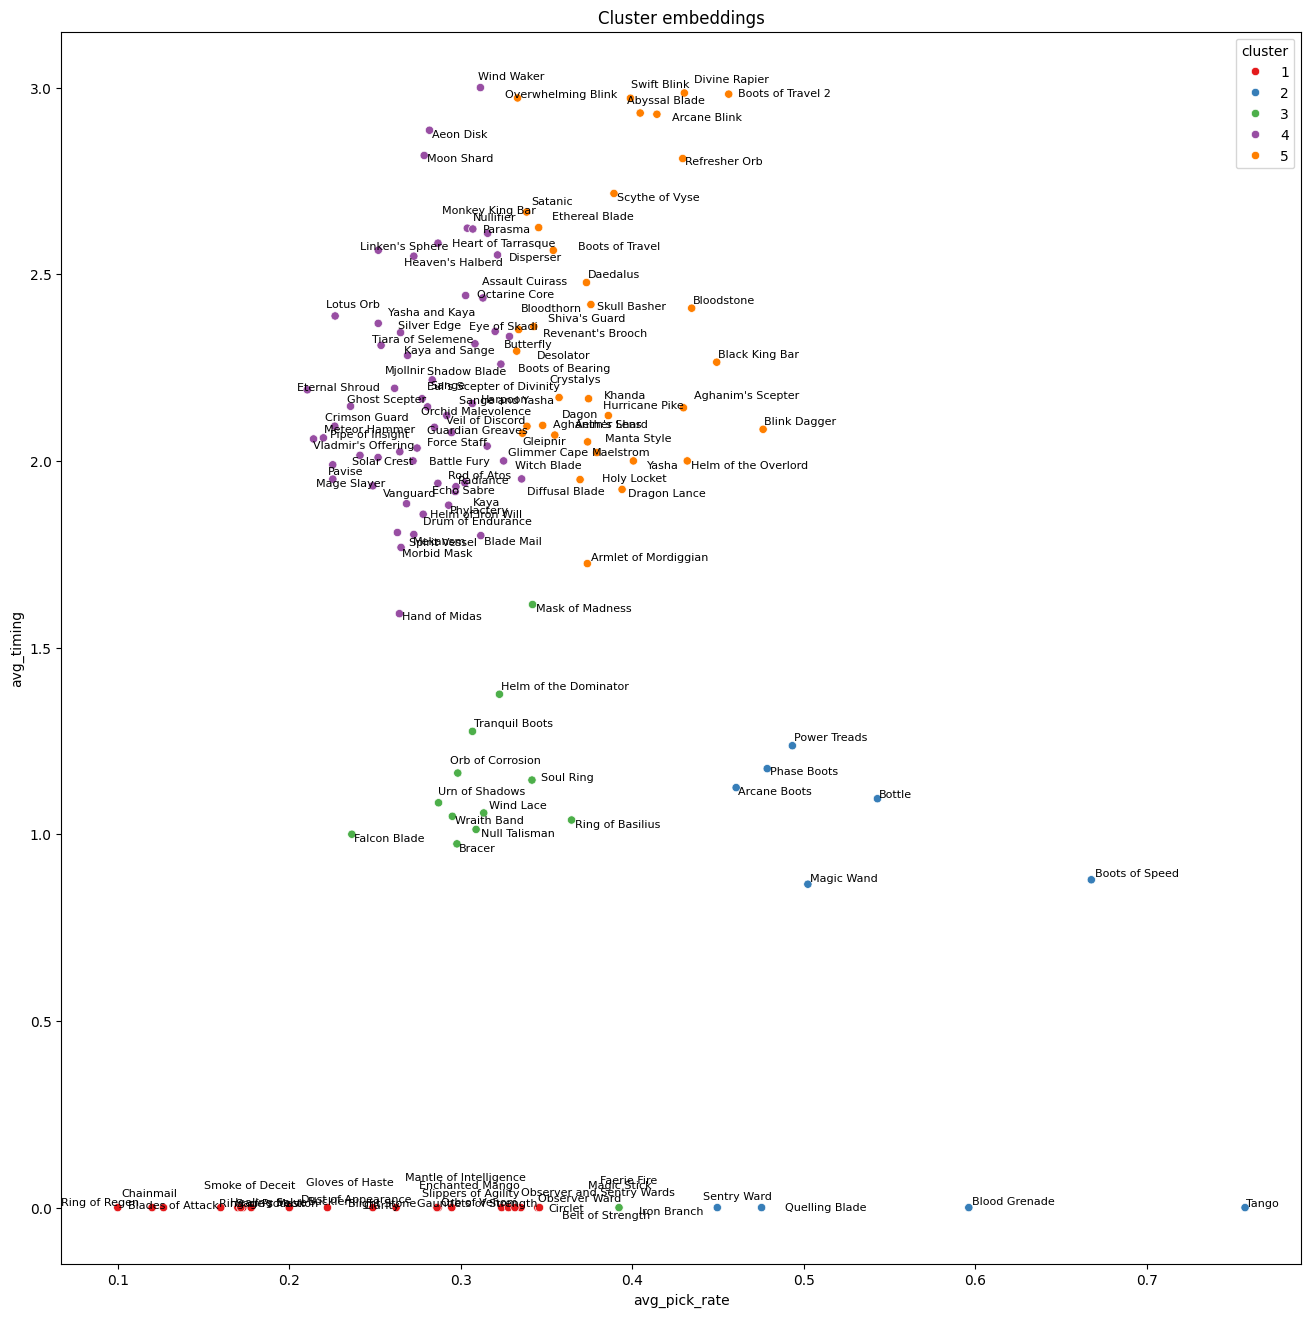

In [26]:
from sklearn.preprocessing import StandardScaler
from adjustText import adjust_text

def kmeans_manual(df, k=5, max_iter=100, tol=1e-4):
    # Нормализация данных для лучшего качества кластеризации
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df[['avg_pick_rate', 'avg_timing']])

    # Инициализация случайных центроидов
    np.random.seed(42)
    centroids = df_scaled[np.random.choice(df_scaled.shape[0], k, replace=False)]
    
    for _ in range(max_iter):
        # Присваиваем каждому объекту ближайший центроид
        distances = np.linalg.norm(df_scaled[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        # Сохраняем старые центроиды
        old_centroids = centroids.copy()

        # Пересчитываем центроиды
        centroids = np.array([df_scaled[labels == i].mean(axis=0) for i in range(k)])

        # Прекращаем, если центроиды не изменились (конвергенция)
        if np.all(np.abs(centroids - old_centroids) < tol):
            break
    
    return labels, centroids

# Применяем кластеризацию
labels, centroids = kmeans_manual(result, k=5)

# Добавляем метки кластеров в датафрейм
result['cluster'] = labels + 1

# График
def plot_clusters(hue, k=5):
    np.random.seed(727)
    plt.figure(figsize=(16, 16))
    plt.title("{} embeddings".format(hue).capitalize())
    big_data = result  # Используем весь результат

    # Цвета для кластеров
    palette = sns.color_palette("Set1", n_colors=k)  # Можно использовать любую палитру или определить свои цвета

    ax = sns.scatterplot(data=big_data, x="avg_pick_rate", y="avg_timing", hue=hue, palette=palette)

    # Добавляем текстовые аннотации
    texts = []
    for i, point in big_data.iterrows():
        texts.append(plt.text(point['avg_pick_rate'] + 0.0002, point['avg_timing'] + 0.0001, str(point["Item"]), fontsize=8))
    adjust_text(texts)

# Отображаем график с кластеризацией по столбцу 'cluster'
plot_clusters('cluster', 5)
plt.show()

In [27]:
plot_df = pd.DataFrame({"items": big_items,
                        "embedding1": embeddings_2d[:, 0],
                        "embedding2": embeddings_2d[:, 1],
                        "cluster": "cluster" + pd.Series(clusters).astype(str)})

In [28]:
def plot_clusters(hue):
    np.random.seed(727)
    plt.figure(figsize=(20, 20))
    plt.title("{} embeddings".format(hue).capitalize())
    # big_data = plot_df[:len(plot_df) // 5]
    big_data = plot_df
    ax = sns.scatterplot(data=big_data, x="embedding1", y="embedding2", hue=hue)
    texts = []
    for i, point in big_data.iterrows():
        # if point["items"] in big_data["items"]:
        texts.append(plt.text(point['embedding1']+0.0002, point['embedding2']+0.0001, str(point["items"]), fontsize=8))
    adjust_text(texts)

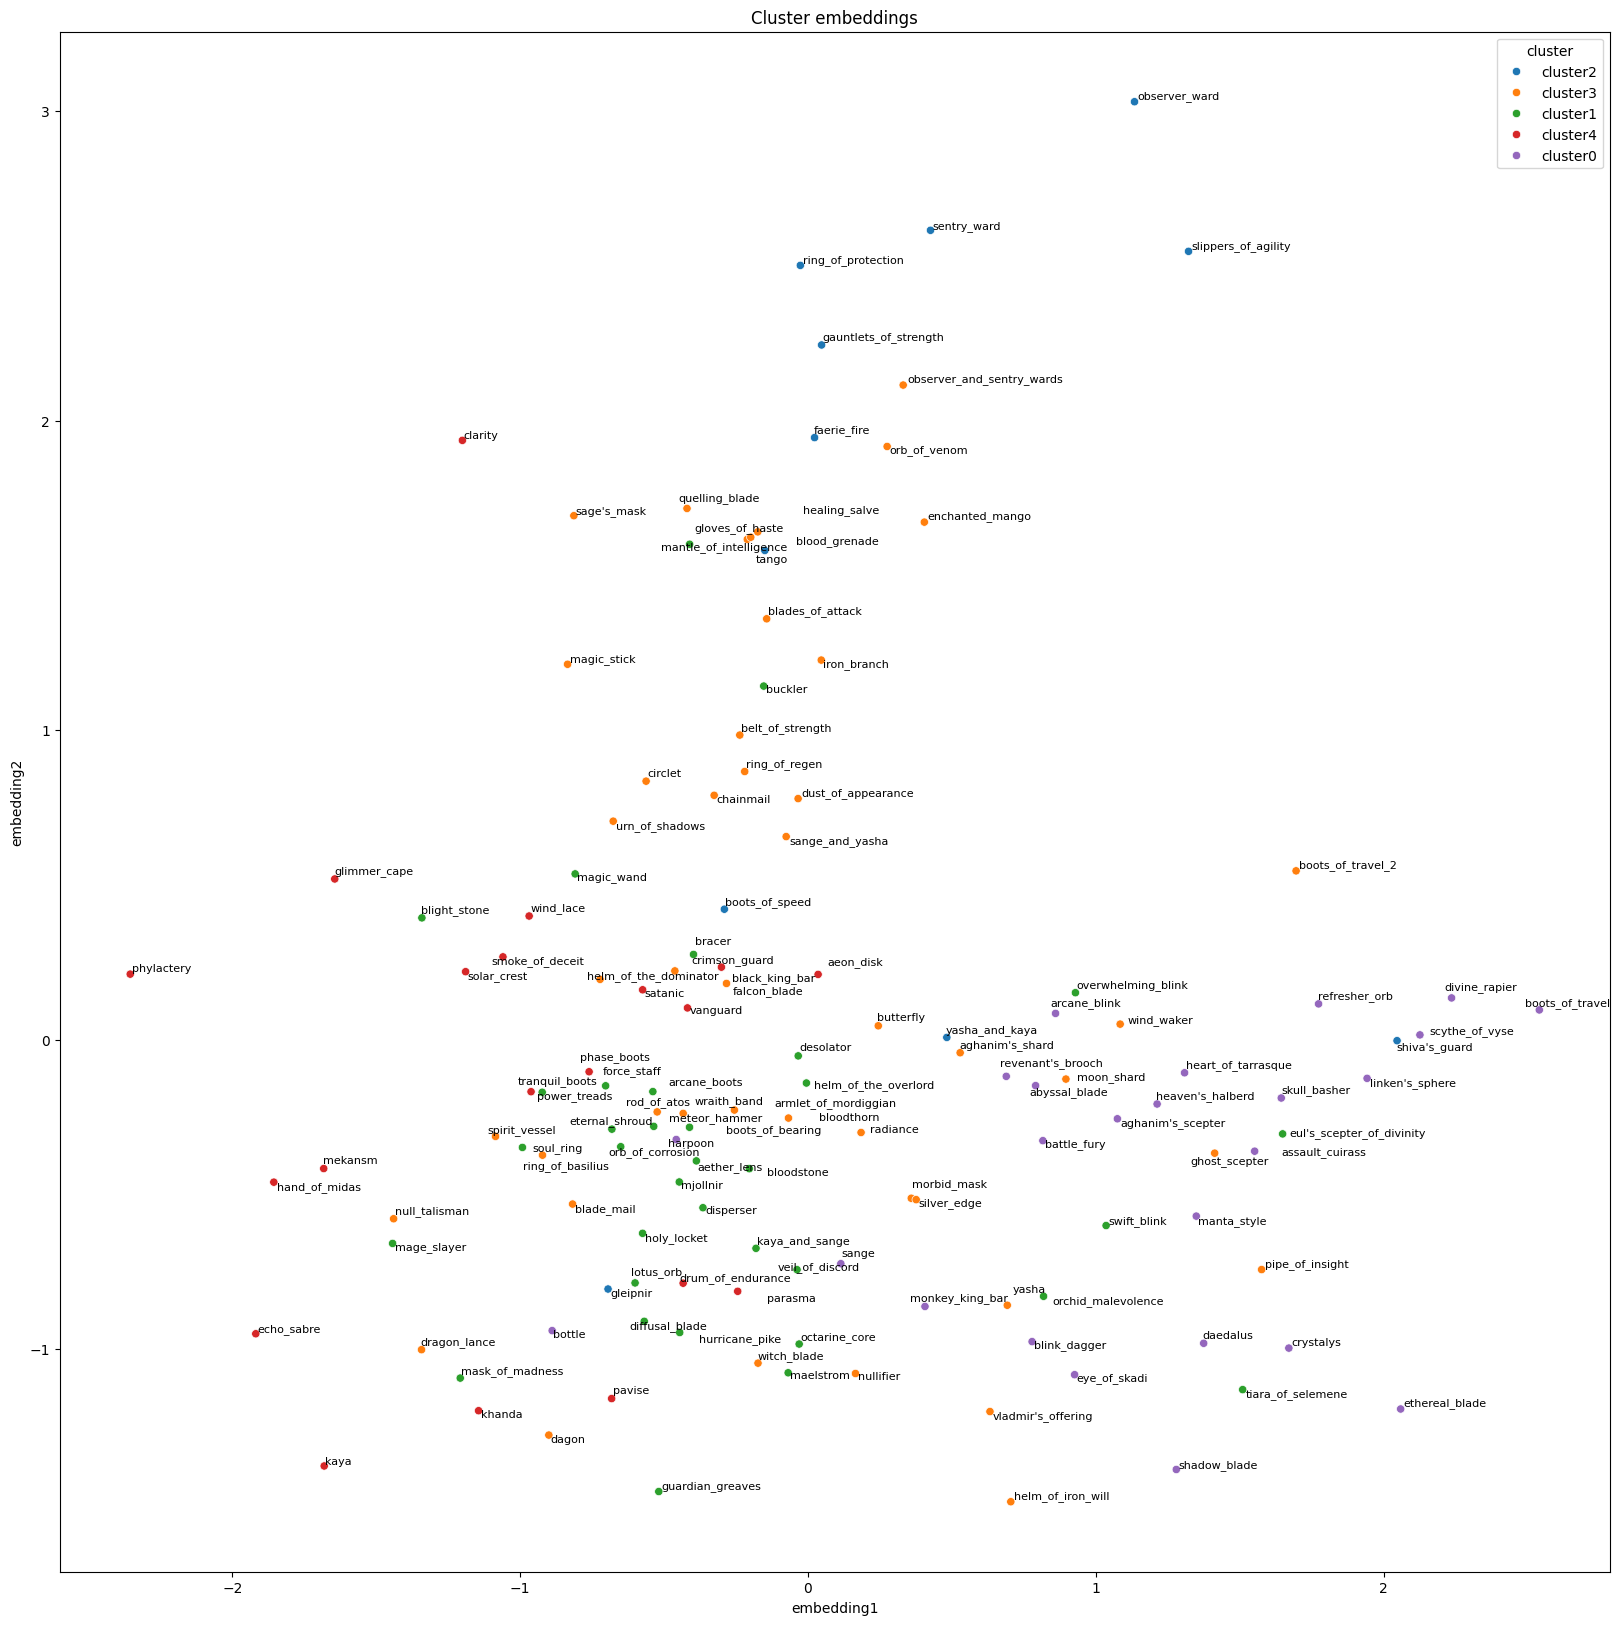

In [29]:
plot_clusters("cluster")

In [501]:
def remove_selenium(string):
    return ' '.join(str(string).split(' ')[:-1])
    

pd.set_option('display.max_columns', None)

# Считываем все таблицы
winners = pd.read_csv("csv/winners.csv")
teams = pd.read_csv("csv/teams.csv")
team_characters = pd.read_csv("csv/team_characters.csv")
stats = pd.read_csv("csv/stats.csv")
itemstats = pd.read_csv("csv/itemstats.csv")
items = pd.read_csv("csv/items.csv")
winrate = pd.read_csv("csv/character_winrate.csv")
aspect_stats = pd.read_csv("csv/aspect_stats.csv")

# Объединяем таблицы
# Шаг 1: Добавляем победителя к таблице teams
teams = teams.merge(winners, on="game", how="left")

# Шаг 2: Добавляем персонажей к каждой команде
teams = teams.merge(team_characters, on=["team"], how="left")

# Шаг 3: Добавляем статистику персонажей
teams = teams.merge(stats, left_on="character", right_on="Character", how="left")

# Удаляем дубликат столбца "Character" после объединения
teams.drop(columns=["character"], inplace=True)

# Шаг 4: Добавляем данные о предметах
teams = teams.merge(items, on="Character", how="left")
# teams.drop(columns=["character"], inplace=True)

teams["AbstractCharacter"] = teams["Character"].apply(remove_selenium)

# Шаг 5: Добавляем статистику предметов
teams = teams.merge(itemstats, left_on="AbstractCharacter", right_on="Character", how="left")

# Удаляем дубликат столбца "Character" после объединения
# teams.drop(columns=["Character"], inplace=True)

# Шаг 6: Добавляем винрейт персонажей
teams = teams.merge(winrate, left_on="AbstractCharacter", right_on="Character", how="left")

# Шаг 7: Добавляем аспекты и их статистику
teams = teams.merge(aspect_stats, left_on="AbstractCharacter", right_on="character", how="left")

# Выводим объединенный DataFrame
# print(teams.head())
teams = teams.dropna()
teams

,game,team,winner,position,aspect_x,Character_x,HeroStats,Damage,Deny,EPM,GPM,Heal,LastHits,Item_x,ItemCount,AbstractCharacter,Character_y,Item_y,Position,PickRate,Timing,Count,Character,AllPositions,WinRateOnCarry,WinRateOnMid,WinRateOnOffLane,WinRateOnSemiSupport,WinRateOnFullSupport,character,aspect_y,hasAspectPicrateOnCarry,hasAspectPicrateOnMid,hasAspectPickrateOnOfflane,hasAspectPicrateOnSemiSupport,hasAspectPicrateOnFullSupport
0,7791485279,radiant 7791485279,dire 7791485279,0,Gluttony,Doom 7791485279,Doom 7791485279 stats,13983.0,19.0,476.0,505.0,0.0,164.0,blink,1.0,Doom,Doom,Iron Branch,Carry,1.00,Start,1.0,Doom,50.0,40.0,44.0,50.0,46.0,48.0,Doom,Aspect 1,0.388,0.567,0.388,0.860,0.856
1,7791485279,radiant 7791485279,dire 7791485279,0,Gluttony,Doom 7791485279,Doom 7791485279 stats,13983.0,19.0,476.0,505.0,0.0,164.0,blink,1.0,Doom,Doom,Iron Branch,Carry,1.00,Start,1.0,Doom,50.0,40.0,44.0,50.0,46.0,48.0,Doom,Aspect 2,0.597,0.404,0.597,0.119,0.133
2,7791485279,radiant 7791485279,dire 7791485279,0,Gluttony,Doom 7791485279,Doom 7791485279 stats,13983.0,19.0,476.0,505.0,0.0,164.0,blink,1.0,Doom,Doom,Iron Branch,Carry,1.00,Start,1.0,Doom,50.0,40.0,44.0,50.0,46.0,48.0,Doom,Aspect 3,0.016,0.029,0.016,0.020,0.011
3,7791485279,radiant 7791485279,dire 7791485279,0,Gluttony,Doom 7791485279,Doom 7791485279 stats,13983.0,19.0,476.0,505.0,0.0,164.0,blink,1.0,Doom,Doom,Magic Wand,Carry,0.55,Start,1.0,Doom,50.0,40.0,44.0,50.0,46.0,48.0,Doom,Aspect 1,0.388,0.567,0.388,0.860,0.856
4,7791485279,radiant 7791485279,dire 7791485279,0,Gluttony,Doom 7791485279,Doom 7791485279 stats,13983.0,19.0,476.0,505.0,0.0,164.0,blink,1.0,Doom,Doom,Magic Wand,Carry,0.55,Start,1.0,Doom,50.0,40.0,44.0,50.0,46.0,48.0,Doom,Aspect 2,0.597,0.404,0.597,0.119,0.133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11855508,8061128850,dire 8061128850,radiant 8061128850,0,Krill Eater,Tidehunter 8061128850,Tidehunter 8061128850 stats,8960.0,3.0,384.0,368.0,1000.0,138.0,boots,1.0,Tidehunter,Tidehunter,Tiara of Selemene,Full Support,1.00,Late Game,1.0,Tidehunter,52.0,50.0,25.0,53.0,46.0,47.0,Tidehunter,Aspect 2,0.274,0.274,0.274,0.274,0.565
11855509,8061128850,dire 8061128850,radiant 8061128850,0,Krill Eater,Tidehunter 8061128850,Tidehunter 8061128850 stats,8960.0,3.0,384.0,368.0,1000.0,138.0,boots,1.0,Tidehunter,Tidehunter,Scythe of Vyse,Full Support,1.00,Late Game,1.0,Tidehunter,52.0,50.0,25.0,53.0,46.0,47.0,Tidehunter,Aspect 1,0.726,0.726,0.726,0.726,0.435
11855510,8061128850,dire 8061128850,radiant 8061128850,0,Krill Eater,Tidehunter 8061128850,Tidehunter 8061128850 stats,8960.0,3.0,384.0,368.0,1000.0,138.0,boots,1.0,Tidehunter,Tidehunter,Scythe of Vyse,Full Support,1.00,Late Game,1.0,Tidehunter,52.0,50.0,25.0,53.0,46.0,47.0,Tidehunter,Aspect 2,0.274,0.274,0.274,0.274,0.565
11855511,8061128850,dire 8061128850,radiant 8061128850,0,Krill Eater,Tidehunter 8061128850,Tidehunter 8061128850 stats,8960.0,3.0,384.0,368.0,1000.0,138.0,boots,1.0,Tidehunter,Tidehunter,Guardian Greaves,Full Support,1.00,Late Game,1.0,Tidehunter,52.0,50.0,25.0,53.0,46.0,47.0,Tidehunter,Aspect 1,0.726,0.726,0.726,0.726,0.435


In [502]:
big_teams = teams[["game", "team", "winner", "AbstractCharacter", "AllPositions"]]
big_teams = big_teams.copy()
big_teams

,game,team,winner,AbstractCharacter,AllPositions
0,7791485279,radiant 7791485279,dire 7791485279,Doom,50.0
1,7791485279,radiant 7791485279,dire 7791485279,Doom,50.0
2,7791485279,radiant 7791485279,dire 7791485279,Doom,50.0
3,7791485279,radiant 7791485279,dire 7791485279,Doom,50.0
4,7791485279,radiant 7791485279,dire 7791485279,Doom,50.0
...,...,...,...,...,...
11855508,8061128850,dire 8061128850,radiant 8061128850,Tidehunter,52.0
11855509,8061128850,dire 8061128850,radiant 8061128850,Tidehunter,52.0
11855510,8061128850,dire 8061128850,radiant 8061128850,Tidehunter,52.0
11855511,8061128850,dire 8061128850,radiant 8061128850,Tidehunter,52.0


In [503]:
big_teams = big_teams.drop_duplicates()
big_teams

,game,team,winner,AbstractCharacter,AllPositions
0,7791485279,radiant 7791485279,dire 7791485279,Doom,50.0
2700,7791485279,radiant 7791485279,dire 7791485279,Shadow Fiend,52.0
4416,7791485279,radiant 7791485279,dire 7791485279,Centaur Warrunner,48.0
4911,7791485279,radiant 7791485279,dire 7791485279,Bane,53.0
6351,7791485279,radiant 7791485279,dire 7791485279,Vengeful Spirit,50.0
...,...,...,...,...,...
11849105,8061128850,dire 8061128850,radiant 8061128850,Puck,52.0
11850557,8061128850,dire 8061128850,radiant 8061128850,Dark Willow,51.0
11851925,8061128850,dire 8061128850,radiant 8061128850,Lion,52.0
11852597,8061128850,dire 8061128850,radiant 8061128850,Lifestealer,46.0


In [504]:
big_teams["results"] = (
    big_teams["winner"].str.startswith("radiant").astype(int)
)
big_teams

C:\Users\hiter\AppData\Local\Temp\ipykernel_32872\925635883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_teams["results"] = (


,game,team,winner,AbstractCharacter,AllPositions,results
0,7791485279,radiant 7791485279,dire 7791485279,Doom,50.0,0
2700,7791485279,radiant 7791485279,dire 7791485279,Shadow Fiend,52.0,0
4416,7791485279,radiant 7791485279,dire 7791485279,Centaur Warrunner,48.0,0
4911,7791485279,radiant 7791485279,dire 7791485279,Bane,53.0,0
6351,7791485279,radiant 7791485279,dire 7791485279,Vengeful Spirit,50.0,0
...,...,...,...,...,...,...
11849105,8061128850,dire 8061128850,radiant 8061128850,Puck,52.0,1
11850557,8061128850,dire 8061128850,radiant 8061128850,Dark Willow,51.0,1
11851925,8061128850,dire 8061128850,radiant 8061128850,Lion,52.0,1
11852597,8061128850,dire 8061128850,radiant 8061128850,Lifestealer,46.0,1


In [505]:
encoded_cols = pd.get_dummies(big_teams[["team", "winner", "AbstractCharacter", "AllPositions"]])
encoded_cols

AllPositions  team_dire 7791485279  team_dire 7793106281  \
0                 50.0                 False                 False   
2700              52.0                 False                 False   
4416              48.0                 False                 False   
4911              53.0                 False                 False   
6351              50.0                 False                 False   
...                ...                   ...                   ...   
11849105          52.0                 False                 False   
11850557          51.0                 False                 False   
11851925          52.0                 False                 False   
11852597          46.0                 False                 False   
11853797          52.0                 False                 False   

          team_dire 7793156101  team_dire 7793213500  team_dire 7793301146  \
0                        False                 False                 False   
2700                     False                 False                 False   
4416                     False                 False                 False   
4911                     False                 False                 False   
6351                     False                 False                 False   
...                        ...                   ...                   ...   
11849105                 False                 False                 False   
11850557                 False                 False                 False   
11851925                 False                 False                 False   
11852597                 False                 False                 False   
11853797                 False                 False                 False   

          team_dire 7793373489  team_dire 7793451591  team_dire 7828444011  \
0                        False                 False                 False   
2700                     False                 False                 False   
4416                     False                 False                 False   
4911                     False                 False                 False   
6351                     False                 False                 False   
...                        ...                   ...                   ...   
11849105                 False                 False                 False   
11850557                 False                 False                 False   
11851925                 False                 False                 False   
11852597                 False                 False                 False   
11853797                 False                 False                 False   

          team_dire 7828827429  team_dire 7828943225  team_dire 7829748556  \
0                        False                 False                 False   
2700                     False                 False                 False   
4416                     False                 False                 False   
4911                     False                 False                 False   
6351                     False                 False                 False   
...                        ...                   ...                   ...   
11849105                 False                 False                 False   
11850557                 False                 False                 False   
11851925                 False                 False                 False   
11852597                 False                 False                 False   
11853797                 False                 False                 False   

          team_dire 7829829385  team_dire 7830156602  team_dire 7830276532  \
0                        False                 False                 False   
2700                     False                 False                 False   
4416                     False                 False                 False   
4911                     False                

In [506]:
from sklearn.model_selection import train_test_split

# Получить список всех уникальных игр
unique_games = big_teams["game"].unique()

# Разделить игры на train и evaluate в пропорции 5:1
train_games, evaluate_games = train_test_split(unique_games, test_size=1/6, random_state=13707183)

# Добавить новый столбец train
big_teams["train"] = big_teams["game"].isin(train_games)

# Проверить результат
big_teams

C:\Users\hiter\AppData\Local\Temp\ipykernel_32872\3863244508.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_teams["train"] = big_teams["game"].isin(train_games)


,game,team,winner,AbstractCharacter,AllPositions,results,train
0,7791485279,radiant 7791485279,dire 7791485279,Doom,50.0,0,True
2700,7791485279,radiant 7791485279,dire 7791485279,Shadow Fiend,52.0,0,True
4416,7791485279,radiant 7791485279,dire 7791485279,Centaur Warrunner,48.0,0,True
4911,7791485279,radiant 7791485279,dire 7791485279,Bane,53.0,0,True
6351,7791485279,radiant 7791485279,dire 7791485279,Vengeful Spirit,50.0,0,True
...,...,...,...,...,...,...,...
11849105,8061128850,dire 8061128850,radiant 8061128850,Puck,52.0,1,True
11850557,8061128850,dire 8061128850,radiant 8061128850,Dark Willow,51.0,1,True
11851925,8061128850,dire 8061128850,radiant 8061128850,Lion,52.0,1,True
11852597,8061128850,dire 8061128850,radiant 8061128850,Lifestealer,46.0,1,True


In [507]:
big_df = big_teams[["results", "train"]].copy()
big_df

,results,train
0,0,True
2700,0,True
4416,0,True
4911,0,True
6351,0,True
...,...,...
11849105,1,True
11850557,1,True
11851925,1,True
11852597,1,True


In [508]:
big_df = big_df.join(encoded_cols)
big_df

results  train  AllPositions  team_dire 7791485279  \
0               0   True          50.0                 False   
2700            0   True          52.0                 False   
4416            0   True          48.0                 False   
4911            0   True          53.0                 False   
6351            0   True          50.0                 False   
...           ...    ...           ...                   ...   
11849105        1   True          52.0                 False   
11850557        1   True          51.0                 False   
11851925        1   True          52.0                 False   
11852597        1   True          46.0                 False   
11853797        1   True          52.0                 False   

          team_dire 7793106281  team_dire 7793156101  team_dire 7793213500  \
0                        False                 False                 False   
2700                     False                 False                 False   
4416                     False                 False                 False   
4911                     False                 False                 False   
6351                     False                 False                 False   
...                        ...                   ...                   ...   
11849105                 False                 False                 False   
11850557                 False                 False                 False   
11851925                 False                 False                 False   
11852597                 False                 False                 False   
11853797                 False                 False                 False   

          team_dire 7793301146  team_dire 7793373489  team_dire 7793451591  \
0                        False                 False                 False   
2700                     False                 False                 False   
4416                     False                 False                 False   
4911                     False                 False                 False   
6351                     False                 False                 False   
...                        ...                   ...                   ...   
11849105                 False                 False                 False   
11850557                 False                 False                 False   
11851925                 False                 False                 False   
11852597                 False                 False                 False   
11853797                 False                 False                 False   

          team_dire 7828444011  team_dire 7828827429  team_dire 7828943225  \
0                        False                 False                 False   
2700                     False                 False                 False   
4416                     False                 False                 False   
4911                     False                 False                 False   
6351                     False                 False                 False   
...                        ...                   ...                   ...   
11849105                 False                 False                 False   
11850557                 False                 False                 False   
11851925                 False                 False                 False   
11852597                 False                 False                 False   
11853797                 False                 False                 False   

          team_dire 7829748556  team_dire 7829829385  team_dire 7830156602  \
0                        False                 False                 False   
2700                     False                 False                 False   
4416                     False                 False                 False   
4911                     False                 False                 False   
6351                     False          

In [509]:
from xgboost import XGBClassifier

In [510]:
clf_model = XGBClassifier(n_estimators=100, max_depth=10, objective="multi:softmax", num_class=2)

In [511]:
X_train = big_df[big_df["train"]].drop(["results"], axis=1)
y_train = big_df[big_df["train"]].results
X_val = big_df[~big_df["train"]].drop(["results"], axis=1)
y_val = big_df[~big_df["train"]].results

In [512]:
clf_model.fit(X_train, y_train, verbose=1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=2,
              num_parallel_tree=None, ...)

In [513]:
from sklearn import metrics
metrics.accuracy_score(y_val, clf_model.predict(X_val))

0.5011415525114156

In [526]:
def add_embeddings(column, encode_func, embedding_dict, model):
    unique_values = column.apply(lambda x: encode_func(str(x))).unique()
    embeddings = dict(zip(unique_values, model.get_embeddings(unique_values)))
    embedding_dict.update(embeddings)

add_embeddings(big_teams.AbstractCharacter, encode, big_embeddings, model)
add_embeddings(big_teams.game, encode, big_embeddings, model)
add_embeddings(big_teams.team, encode, big_embeddings, model)
add_embeddings(big_teams.AllPositions.apply(winrate_to_winrate), encode, big_embeddings, model)

In [546]:
def get_features_target(mask):

    def get_embeddings(team):
        return big_embeddings.get(encode(str(team)), np.full(200, np.nan))

    X = np.hstack((np.vstack(big_teams[mask].game.apply(get_embeddings).values),
                   np.vstack(big_teams[mask].team.apply(get_embeddings).values),
                   np.vstack(big_teams[mask].AbstractCharacter.apply(get_embeddings).values),
                   np.vstack(big_teams[mask].AllPositions.apply(winrate_to_winrate).apply(get_embeddings).values)))
    y = big_teams[mask].results.values
    return X, y

In [547]:
clf_X_train, y_train = get_features_target((big_teams["train"]))
clf_X_test, y_test = get_features_target((~big_teams["train"]))

In [548]:
clf_X_train.shape, clf_X_test.shape

((4363, 800), (876, 800))

In [549]:
np.isnan(clf_X_test).sum()/clf_X_test.shape[1]

0.0

In [550]:
clf_model = XGBClassifier(n_estimators=500, max_depth=5, objective="multi:softmax", num_class=2)

In [551]:
clf_model.fit(clf_X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None, num_class=2,
              num_parallel_tree=None, ...)

In [552]:
big_teams[~big_teams["train"]].results.value_counts(normalize=True)

results
1    0.501142
0    0.498858
Name: proportion, dtype: float64

In [567]:
metrics.accuracy_score(y_train, clf_model.predict(clf_X_train))

1.0

In [568]:
metrics.accuracy_score(y_test, clf_model.predict(clf_X_test))

0.5079908675799086

In [571]:
# Посчитать количество 0 и 1
count_zeros = np.sum(y_test == 0)
count_ones = np.sum(y_test == 1)

# Вывести результаты
print(f"Count of 0s: {count_zeros / (count_zeros + count_ones)}")
print(f"Count of 1s: {count_ones / (count_zeros + count_ones)}")

Count of 0s: 0.4988584474885845
Count of 1s: 0.5011415525114156


In [572]:
# Посчитать количество 0 и 1
count_zeros = np.sum(y_train == 0)
count_ones = np.sum(y_train == 1)

# Вывести результаты
print(f"Count of 0s: {count_zeros / (count_zeros + count_ones)}")
print(f"Count of 1s: {count_ones / (count_zeros + count_ones)}")

Count of 0s: 0.4831537932615173
Count of 1s: 0.5168462067384827


In [586]:
X_train, X_valid = train_test_split_no_unseen(np.array(triples), test_size=1000000)

In [603]:
df = pd.DataFrame(X_train,columns = ['subject','predicate','object'])
matchSubject = encode("Morphling 7902740242 stats")
print(df[df.subject==matchSubject])

                           subject    predicate       object
10063   morphling_7902740242_stats  hasLastHits      400-600
86258   morphling_7902740242_stats       hasEPM      700-800
97868   morphling_7902740242_stats    hasDamage  20000-25000
149497  morphling_7902740242_stats       hasGPM      600-700
212348  morphling_7902740242_stats      hasHeal       0-1000


In [619]:
dfFiltered = np.array(df[(df.subject!=matchSubject) | ((df.subject==matchSubject) & ~df.predicate.isin([ex.hasGPM.value, ex.hasDamage.value]))])

In [620]:
# Фильтруем строки, где значение в столбце 'subject' равно matchSubject
filtered_rows = dfFiltered[dfFiltered[:, 0] == matchSubject]

# Выводим результаты
print(filtered_rows)

[['morphling_7902740242_stats' 'hasLastHits' '400-600']
 ['morphling_7902740242_stats' 'hasEPM' '700-800']
 ['morphling_7902740242_stats' 'hasHeal' '0-1000']]


In [622]:
model.fit(dfFiltered, epochs=20)

Epoch 1/20
220/220 [==============================] - 32s 146ms/step - loss: 3532.0454
Epoch 2/20
220/220 [==============================] - 35s 159ms/step - loss: 3186.9968
Epoch 3/20
220/220 [==============================] - 33s 148ms/step - loss: 2915.0051
Epoch 4/20
220/220 [==============================] - 32s 146ms/step - loss: 2693.4304
Epoch 5/20
220/220 [==============================] - 33s 150ms/step - loss: 2511.3975
Epoch 6/20
220/220 [==============================] - 33s 149ms/step - loss: 2359.5688
Epoch 7/20
220/220 [==============================] - 32s 146ms/step - loss: 2231.0232
Epoch 8/20
220/220 [==============================] - 34s 153ms/step - loss: 2122.0959
Epoch 9/20
220/220 [==============================] - 33s 150ms/step - loss: 2027.2666
Epoch 10/20
220/220 [==============================] - 33s 149ms/step - loss: 1944.3043
Epoch 11/20
220/220 [==============================] - 33s 148ms/step - loss: 1871.5121
Epoch 12/20
220/220 [====================

In [627]:
statements = np.array([
    [f'{matchSubject}', ex.hasDamage.value, "0-5000"],
    [f'{matchSubject}', ex.hasDamage.value, "5000-10000"],
    [f'{matchSubject}', ex.hasDamage.value, "10000-15000"],
    [f'{matchSubject}', ex.hasDamage.value, "15000-20000"],
    [f'{matchSubject}', ex.hasDamage.value, "20000-25000"],
    [f'{matchSubject}', ex.hasDamage.value, "25000-30000"],
    [f'{matchSubject}', ex.hasDamage.value, "30000-40000"],
    [f'{matchSubject}', ex.hasDamage.value, "40000-50000"],
    [f'{matchSubject}', ex.hasDamage.value, "50000-100000"],

    [f'{matchSubject}', ex.hasGPM.value, "0-100"],
    [f'{matchSubject}', ex.hasGPM.value, "100-200"],
    [f'{matchSubject}', ex.hasGPM.value, "200-300"],
    [f'{matchSubject}', ex.hasGPM.value, "300-400"],
    [f'{matchSubject}', ex.hasGPM.value, "400-500"],
    [f'{matchSubject}', ex.hasGPM.value, "500-600"],
    [f'{matchSubject}', ex.hasGPM.value, "600-700"],
    [f'{matchSubject}', ex.hasGPM.value, "700-800"],
    [f'{matchSubject}', ex.hasGPM.value, "800-900"],
    [f'{matchSubject}', ex.hasGPM.value, "900-1000"],
    [f'{matchSubject}', ex.hasGPM.value, "1000-5000"]
])

In [628]:
statements_filter = np.array(list({tuple(i) for i in np.vstack((dfFiltered, statements))}))

array([['shadow_demon_sentry_ward_pick_rate_onmid', 'itemValue', '1'],
       ['brewmaster_aspect_2_pick_rate_on_full_support',
        'aspectPickRateValue', '0.556'],
       ['viper_yasha_pick_rate_oncarry', 'itemValue', '1'],
       ...,
       ['alchemist_8045581903', 'hasItem',
        'alchemist_8045581903_manta_count'],
       ['void_spirit_enchanted_mango_pick_rate_onsemi_support',
        'refersToItem', 'enchanted_mango'],
       ['sven_8037858468_refresher_count', 'itemValue', '1']],
      dtype='<U201')

In [629]:
ranks = model.evaluate(statements,
                      use_filter={'train': dfFiltered,
                                  'test': statements},
                      corrupt_side='s,o',
                      verbose=True)

3/3 [==============================] - 1s 404ms/step


In [630]:
scores = model.predict(statements)
scores

array([ 1.4282119 ,  0.9382813 ,  0.97172904,  2.4409554 ,  3.9330785 ,
        0.9409096 ,  2.1490366 ,  0.644912  ,  0.31275344, -0.65465546,
        0.8565568 ,  0.578853  ,  1.6828127 ,  0.71510005,  1.3176931 ,
        3.180262  ,  0.8557657 , -0.3105944 ,  0.71483266, -0.45605072],
      dtype=float32)

In [632]:
from scipy.special import expit
probs = expit(scores)

pd.DataFrame(list(zip([' '.join(x) for x in statements],
                      ranks,
                      np.squeeze(scores),
                      np.squeeze(probs))),
             columns=['statement', 'rank', 'score', 'prob']).sort_values("prob", ascending=False)

,statement,rank,score,prob
4,morphling_7902740242_stats hasDamage 20000-25000,"[1559, 1]",3.933079,0.980793
15,morphling_7902740242_stats hasGPM 600-700,"[2696, 1]",3.180262,0.960085
3,morphling_7902740242_stats hasDamage 15000-20000,"[3173, 3]",2.440955,0.919897
6,morphling_7902740242_stats hasDamage 30000-40000,"[4106, 7]",2.149037,0.895579
12,morphling_7902740242_stats hasGPM 300-400,"[3916, 24]",1.682813,0.843277
0,morphling_7902740242_stats hasDamage 0-5000,"[8454, 183]",1.428212,0.806623
14,morphling_7902740242_stats hasGPM 500-600,"[11249, 119]",1.317693,0.788798
2,morphling_7902740242_stats hasDamage 10000-15000,"[11583, 1479]",0.971729,0.725464
5,morphling_7902740242_stats hasDamage 25000-30000,"[13699, 1648]",0.940910,0.719283
1,morphling_7902740242_stats hasDamage 5000-10000,"[8431, 1655]",0.938281,0.718752
